In [1]:
from numpy import *
import numpy as np

def loadDataSet(fileName, delim='\t'):
    fr = open(fileName)
    stringArr = [line.strip().split(delim) for line in fr.readlines()]
    datArr = [list(map(float,line)) for line in stringArr]
    return np.asmatrix(datArr)

def pca(dataMat, topNfeat=9999999):
 
    meanVals = dataMat.mean(0)
    meanRemoved = dataMat - meanVals #remove mean
    covMat = cov(meanRemoved, rowvar=0)
    eigVals,eigVects = linalg.eig(np.asmatrix(covMat))
    eigValInd = argsort(eigVals)            #sort, sort goes smallest to largest
    eigValInd = eigValInd[:-(topNfeat+1):-1]  #cut off unwanted dimensions
    redEigVects = eigVects[:,eigValInd]       #reorganize eig vects largest to smallest
    lowDDataMat = meanRemoved * redEigVects#transform data into new dimensions    
    reconMat = (lowDDataMat * redEigVects.T) + meanVals
    return lowDDataMat, reconMat

In [2]:
dataMat = loadDataSet('testSet.txt')

In [3]:
dataMat

matrix([[ 9.469054,  9.955259],
        [ 9.078997,  8.764903],
        [ 8.500491,  6.685477],
        ...,
        [ 8.966256,  7.710369],
        [ 6.712967,  7.568772],
        [ 7.903583, 10.921571]], shape=(1000, 2))

In [4]:
dataMat.mean(0)

matrix([[8.97892301, 8.97446742]])

In [5]:
lowDMat, reconMat = pca(dataMat, 1)

In [6]:
lowDMat

matrix([[-1.09319591e+00],
        [ 1.28220982e-01],
        [ 2.20897848e+00],
        [ 9.59719208e-01],
        [ 5.93901140e-01],
        [ 1.58163525e-02],
        [-1.51762609e+00],
        [-1.61908824e+00],
        [-1.55005994e+00],
        [-9.48142908e-01],
        [ 1.14006376e-01],
        [-6.90165480e-01],
        [-1.25713664e+00],
        [ 1.73681701e+00],
        [ 2.26169368e+00],
        [-1.00950183e+00],
        [ 1.49041596e+00],
        [-4.69427354e-01],
        [-2.25347109e+00],
        [ 1.78170971e+00],
        [-5.45927157e-01],
        [-1.28383865e+00],
        [-2.50168712e+00],
        [-4.07217593e-01],
        [ 3.98802873e-01],
        [-6.39438307e-01],
        [-3.40073066e-01],
        [-2.37555725e+00],
        [ 1.31793732e+00],
        [-2.01295935e+00],
        [-1.77576902e+00],
        [ 1.17576373e+00],
        [-1.86949693e+00],
        [ 1.03174593e+00],
        [ 2.48235099e-01],
        [ 7.04646715e-01],
        [ 2.84832426e+00],
 

In [7]:
reconMat

matrix([[9.54132594, 9.91190021],
        [8.91295875, 8.8645159 ],
        [7.84249726, 7.08023342],
        ...,
        [8.41790648, 8.03934552],
        [7.75906981, 6.94117363],
        [9.55329191, 9.9318455 ]], shape=(1000, 2))

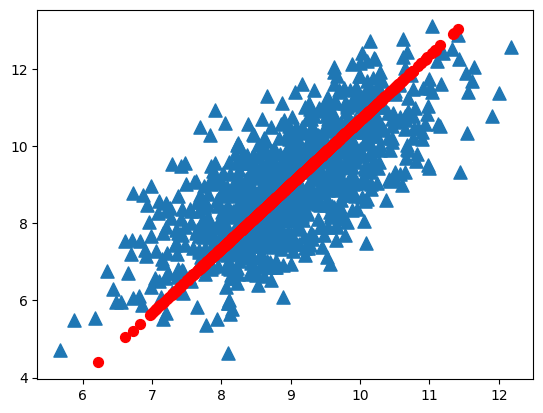

In [8]:
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataMat[:, 0].flatten().A[0], dataMat[:, 1].flatten().A[0], marker='^', s=90)
ax.scatter(reconMat[:, 0].flatten().A[0], reconMat[:, 1].flatten().A[0], marker='o', s=50, c='red')
plt.show()

In [ ]:
原始数据集（三角点表示）及第一主成分（圆形点表示）

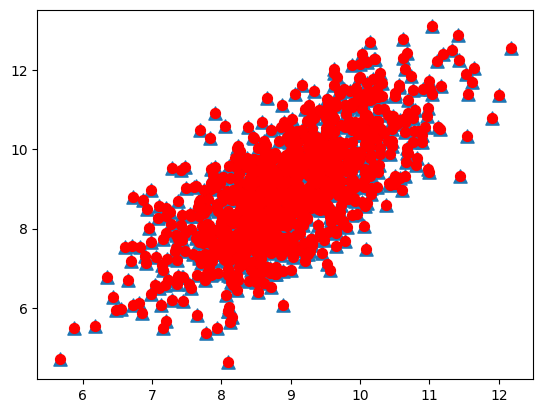

In [9]:
lowDMat, reconMat = pca(dataMat, 2)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataMat[:, 0].flatten().A[0], dataMat[:, 1].flatten().A[0], marker='^', s=90)
ax.scatter(reconMat[:, 0].flatten().A[0], reconMat[:, 1].flatten().A[0], marker='o', s=50, c='red')
plt.show()

In [10]:
def replaceNanWithMean(): 
    datMat = loadDataSet('secom.data', ' ')
    numFeat = shape(datMat)[1]
    for i in range(numFeat):
        meanVal = mean(datMat[nonzero(~isnan(datMat[:,i].A))[0],i]) #values that are not NaN (a number)
        datMat[nonzero(isnan(datMat[:,i].A))[0],i] = meanVal  #set NaN values to mean
    return datMat

In [11]:
dataMat = replaceNanWithMean()
dataMat

matrix([[3.03093000e+03, 2.56400000e+03, 2.18773330e+03, ...,
         1.64749042e-02, 5.28333333e-03, 9.96700663e+01],
        [3.09578000e+03, 2.46514000e+03, 2.23042220e+03, ...,
         2.01000000e-02, 6.00000000e-03, 2.08204500e+02],
        [2.93261000e+03, 2.55994000e+03, 2.18641110e+03, ...,
         4.84000000e-02, 1.48000000e-02, 8.28602000e+01],
        ...,
        [2.97881000e+03, 2.37978000e+03, 2.20630000e+03, ...,
         8.60000000e-03, 2.50000000e-03, 4.35231000e+01],
        [2.89492000e+03, 2.53201000e+03, 2.17703330e+03, ...,
         2.45000000e-02, 7.50000000e-03, 9.34941000e+01],
        [2.94492000e+03, 2.45076000e+03, 2.19544440e+03, ...,
         1.62000000e-02, 4.50000000e-03, 1.37784400e+02]],
       shape=(1567, 590))

In [12]:
meanVals = mean(dataMat, 0)
meanVals

matrix([[ 3.01445290e+03,  2.49585023e+03,  2.20054732e+03,
          1.39637663e+03,  4.19701314e+00,  1.00000000e+02,
          1.01112908e+02,  1.21821502e-01,  1.46286166e+00,
         -8.41022364e-04,  1.45750799e-04,  9.64352780e-01,
          1.99956809e+02,  0.00000000e+00,  9.00537052e+00,
          4.13086035e+02,  9.90760281e+00,  9.71443926e-01,
          1.90047354e+02,  1.24810340e+01,  1.40505424e+00,
         -5.61839361e+03,  2.69937843e+03, -3.80629973e+03,
         -2.98598136e+02,  1.20384473e+00,  1.93847681e+00,
          6.63862799e+00,  6.94995323e+01,  2.36619744e+00,
          1.84158914e-01,  3.67318939e+00,  8.53374687e+01,
          8.96027854e+00,  5.05826386e+01,  6.45557870e+01,
          4.94173705e+01,  6.62212736e+01,  8.68365766e+01,
          1.18679554e+02,  6.79049093e+01,  3.35306617e+00,
          7.00000000e+01,  3.55538904e+02,  1.00311650e+01,
          1.36743060e+02,  7.33672811e+02,  1.17795811e+00,
          1.39972231e+02,  1.00000000e+0

In [13]:
meanRemoved = dataMat - meanVals
meanRemoved

matrix([[ 1.64771044e+01,  6.81497692e+01, -1.28140177e+01, ...,
          2.77555756e-17,  1.99493200e-17,  1.70530257e-13],
        [ 8.13271044e+01, -3.07102308e+01,  2.98748823e+01, ...,
          3.62509579e-03,  7.16666667e-04,  1.08534434e+02],
        [-8.18428956e+01,  6.40897692e+01, -1.41362177e+01, ...,
          3.19250958e-02,  9.51666667e-03, -1.68098663e+01],
        ...,
        [-3.56428956e+01, -1.16070231e+02,  5.75268229e+00, ...,
         -7.87490421e-03, -2.78333333e-03, -5.61469663e+01],
        [-1.19532896e+02,  3.61597692e+01, -2.35140177e+01, ...,
          8.02509579e-03,  2.21666667e-03, -6.17596635e+00],
        [-6.95328956e+01, -4.50902308e+01, -5.10291771e+00, ...,
         -2.74904215e-04, -7.83333333e-04,  3.81143337e+01]],
       shape=(1567, 590))

In [14]:
covMat = cov(meanRemoved, rowvar=0)
covMat

array([[ 5.39940056e+03, -8.47962623e+02,  1.02671010e+01, ...,
        -1.67440688e-02, -5.93197815e-03,  2.87879850e+01],
       [-8.47962623e+02,  6.43649877e+03,  1.35942679e+01, ...,
         1.21967287e-02,  2.32652705e-03,  3.37335304e+02],
       [ 1.02671010e+01,  1.35942679e+01,  8.63239193e+02, ...,
        -7.59126039e-03, -2.59521865e-03, -9.07023669e+01],
       ...,
       [-1.67440688e-02,  1.21967287e-02, -7.59126039e-03, ...,
         7.75231441e-05,  2.45865358e-05,  3.22979001e-01],
       [-5.93197815e-03,  2.32652705e-03, -2.59521865e-03, ...,
         2.45865358e-05,  8.21484994e-06,  1.04706789e-01],
       [ 2.87879850e+01,  3.37335304e+02, -9.07023669e+01, ...,
         3.22979001e-01,  1.04706789e-01,  8.81006310e+03]],
      shape=(590, 590))

In [15]:
eigVals, eigVects = linalg.eig(np.asmatrix(covMat))

In [16]:
print(eigVals); len(eigVals)

[ 5.34151979e+07  2.17466719e+07  8.24837662e+06  2.07388086e+06
  1.31540439e+06  4.67693557e+05  2.90863555e+05  2.83668601e+05
  2.37155830e+05  2.08513836e+05  1.96098849e+05  1.86856549e+05
  1.52422354e+05  1.13215032e+05  1.08493848e+05  1.02849533e+05
  1.00166164e+05  8.33473762e+04  8.15850591e+04  7.76560524e+04
  6.66060410e+04  6.52620058e+04  5.96776503e+04  5.16269933e+04
  5.03324580e+04  4.54661746e+04  4.41914029e+04  4.15532551e+04
  3.55294040e+04  3.31436743e+04  2.67385181e+04  1.47123429e+04
  1.44089194e+04  1.09321187e+04  1.04841308e+04  9.48876548e+03
  8.34665462e+03  7.22765535e+03  5.34196392e+03  4.95614671e+03
  4.23060022e+03  4.10673182e+03  3.41199406e+03  3.24193522e+03
  2.74523635e+03  2.35027999e+03  2.16835314e+03  1.86414157e+03
  1.76741826e+03  1.70492093e+03  1.66199683e+03  1.53948465e+03
  1.33096008e+03  1.25591691e+03  1.15509389e+03  1.12410108e+03
  1.03213798e+03  1.00972093e+03  9.50542179e+02  9.09791361e+02
  8.32001551e+02  8.08898

590

In [17]:
print(eigVects); len(eigVects)

[[-6.39070760e-04 -1.20314234e-04  1.22460363e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.35722934e-05 -6.60163227e-04  1.71369126e-03 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.36801459e-04  1.58026311e-04  3.28185512e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 2.61329351e-08 -6.06233975e-09  1.09328336e-09 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 5.62597732e-09  5.96647587e-09  8.83024927e-09 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 3.89298443e-04 -2.32070657e-04  7.13534990e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


590

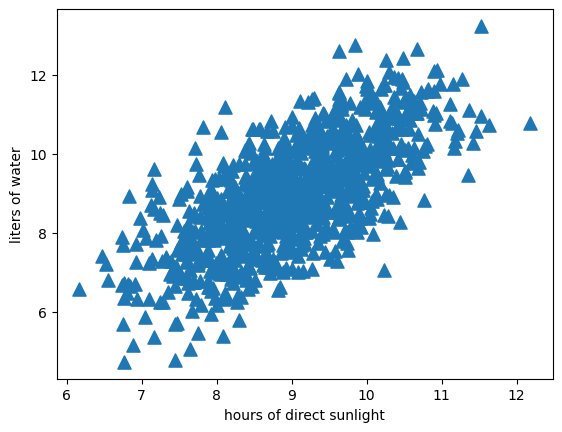

In [18]:
# create Fig 1

from numpy import *
import matplotlib
import matplotlib.pyplot as plt

n = 1000 #number of points to create
xcord0 = []
ycord0 = []
xcord1 = []
ycord1 = []
markers =[]
colors =[]
fw = open('testSet.txt','w')
for i in range(n):
    [r0,r1] = random.standard_normal(2)
    fFlyer = r0 + 9.0
    tats = 1.0*r1 + fFlyer + 0
    xcord0.append(fFlyer)
    ycord0.append(tats)
    fw.write("%f\t%f\n" % (fFlyer, tats))

fw.close()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xcord0,ycord0, marker='^', s=90)
plt.xlabel('hours of direct sunlight')
plt.ylabel('liters of water')
plt.show()

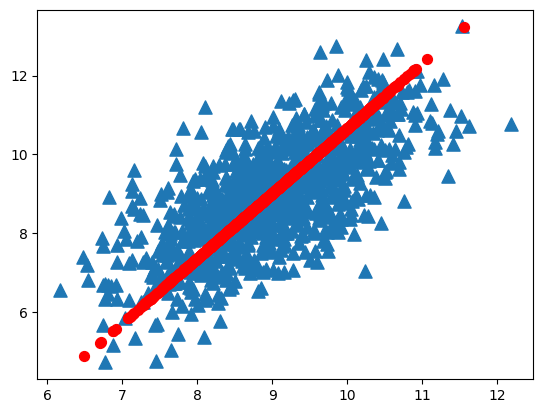

In [25]:
# create fig 2


from numpy import *
import matplotlib
import matplotlib.pyplot as plt
import pca

# Load the data
dataMat = pca.loadDataSet('testSet.txt')

# Convert to regular numpy array if it's a masked array
if hasattr(dataMat, 'mask'):
    dataMat = dataMat.data

# Apply PCA
lowDMat, reconMat = pca.pca(dataMat, 1)

# Convert to regular numpy array if it's a masked array
if hasattr(reconMat, 'mask'):
    reconMat = reconMat.data

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111)

# Convert to lists to avoid any array issues
x_original = dataMat[:, 0].tolist()
y_original = dataMat[:, 1].tolist()
x_recon = reconMat[:, 0].tolist()
y_recon = reconMat[:, 1].tolist()

# Plot the data
ax.scatter(x_original, y_original, marker='^', s=90)
ax.scatter(x_recon, y_recon, marker='o', s=50, c='red')
plt.show()



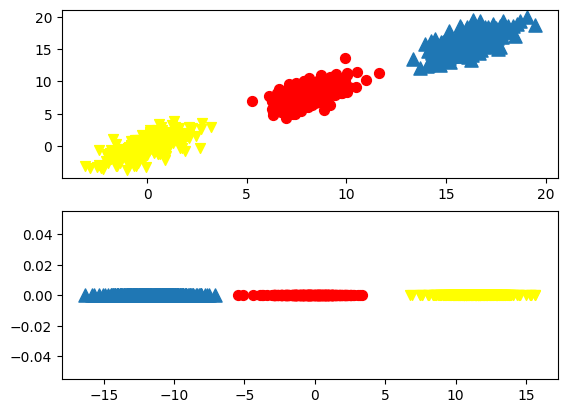

In [27]:
# createFig 3


from numpy import *
import matplotlib
import matplotlib.pyplot as plt
import pca

n = 1000 #number of points to create
xcord0 = []; ycord0 = []
xcord1 = []; ycord1 = []
xcord2 = []; ycord2 = []
markers =[]
colors =[]
fw = open('testSet3.txt','w')
for i in range(n):
    groupNum = int(3*random.uniform())
    [r0,r1] = random.standard_normal(2)
    if groupNum == 0:
        x = r0 + 16.0
        y = 1.0*r1 + x
        xcord0.append(x)
        ycord0.append(y)
    elif groupNum == 1:
        x = r0 + 8.0
        y = 1.0*r1 + x
        xcord1.append(x)
        ycord1.append(y)
    elif groupNum == 2:
        x = r0 + 0.0
        y = 1.0*r1 + x
        xcord2.append(x)
        ycord2.append(y)
    fw.write("%f\t%f\t%d\n" % (x, y, groupNum))

fw.close()
fig = plt.figure()
ax = fig.add_subplot(211)
ax.scatter(xcord0,ycord0, marker='^', s=90)
ax.scatter(xcord1,ycord1, marker='o', s=50, c='red')
ax.scatter(xcord2,ycord2, marker='v', s=50, c='yellow')
ax = fig.add_subplot(212)
myDat = pca.loadDataSet('testSet3.txt')
lowDDat,reconDat = pca.pca(myDat[:,0:2],1)

# Convert to regular numpy arrays
lowDDat = np.array(lowDDat)
myDat = np.array(myDat)

# Get indices for each group
indices0 = np.where(myDat[:,2]==0)[0]
indices1 = np.where(myDat[:,2]==1)[0]
indices2 = np.where(myDat[:,2]==2)[0]

# Extract 1D arrays for each group
label0Mat = lowDDat[indices0, 0].flatten()
label1Mat = lowDDat[indices1, 0].flatten()
label2Mat = lowDDat[indices2, 0].flatten()

# Plot using lists instead of arrays
ax.scatter(label0Mat.tolist(), [0]*len(label0Mat), marker='^', s=90)
ax.scatter(label1Mat.tolist(), [0]*len(label1Mat), marker='o', s=50, c='red')
ax.scatter(label2Mat.tolist(), [0]*len(label2Mat), marker='v', s=50, c='yellow')
plt.show()
# 二维空间的3个类别。当在该数据集上应用PCA时，就可以去掉一维，从而使得该分类问题变得更容易处理。

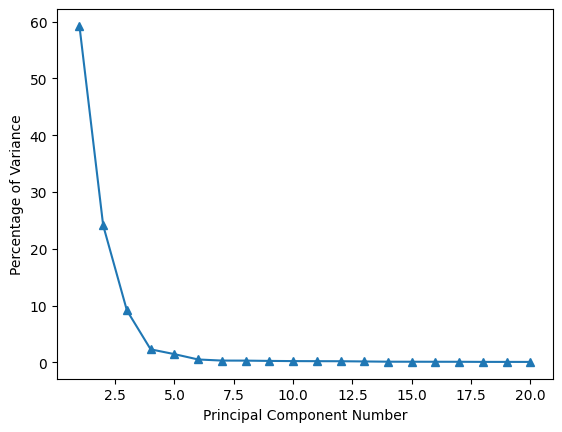

In [21]:
#from numpy import *

# createFig 4
import matplotlib
import matplotlib.pyplot as plt
import pca
import numpy as np

dataMat = pca.replaceNanWithMean()

#below is a quick hack copied from pca.pca()
meanVals = mean(dataMat, axis=0)
meanRemoved = dataMat - meanVals #remove mean
covMat = cov(meanRemoved, rowvar=0)
eigVals,eigVects = linalg.eig(np.asmatrix(covMat))
eigValInd = argsort(eigVals)            #sort, sort goes smallest to largest
eigValInd = eigValInd[::-1]#reverse
sortedEigVals = eigVals[eigValInd]
total = sum(sortedEigVals)
varPercentage = sortedEigVals/total*100

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1, 21), varPercentage[:20], marker='^')
plt.xlabel('Principal Component Number')
plt.ylabel('Percentage of Variance')
plt.show()

在图134中已经给出了总方差的百分比，我们发现，在开始几个主成分之后，方差就会迅速下降。图134　前20个主成分占总方差的百分比。可以看出，大部分方差都包含在前面的几个主成分中，舍弃后面的主成分并不会损失太多的信息。如果保留前6个主成分，则数据集可以从590个特征约简成6个特征，大概实现了100:1的压缩.

Peter Harrington. 机器学习实战 (图灵程序设计丛书 72) (Chinese Edition) (p. 475). 人民邮电出版社. Kindle Edition. 